In [ ]:
!pip install ctgan
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.5/70.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.3/160.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: Faker
    Found existing installation: Faker 19.11.0
    Uninstalling Faker-19.11.0:
      Successfully uninstalled Faker-19.11.0


In [ ]:
from ctgan import CTGAN

import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import time

start=time.time()

dataset = pd.read_csv('https://raw.githubusercontent.com/mahayasa/various-sampling-churn-prediction/main/data/mobile-churn.csv')


df1=dataset[dataset['churn']==0]
df=dataset[dataset['churn']==1]

#filling missing value with mean
df = df.fillna(df.mean())
df=df.drop(['year','month','user_account_id'],axis=1)

#filling missing value with mean
df1 = df1.fillna(df1.mean())
df1=df1.drop(['year','month','user_account_id'],axis=1)

batch_size = 5000
epochs = 100
model = CTGAN(batch_size=batch_size, epochs=epochs, verbose=True)
model.fit(df)

end=time.time()
print("The time of execution of preprocess:",
      (end-start), "s")




Gen. (-6.17) | Discrim. (-0.16): 100%|██████████| 100/100 [07:40<00:00,  4.60s/it]

The time of execution of preprocess: 587.8822479248047 s


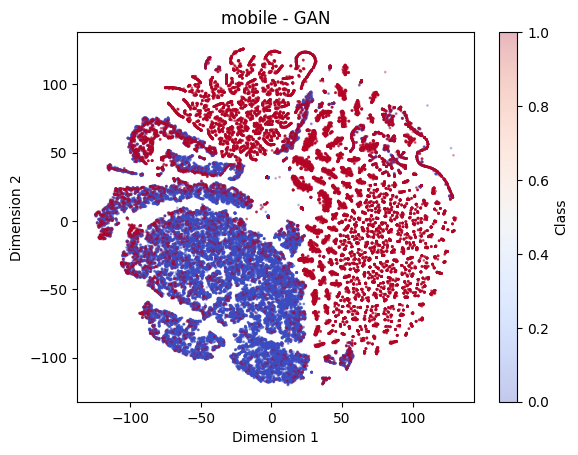

In [ ]:
n_generated_data = 38655
generated_df = model.sample(n_generated_data)

#concat original data and gan data
data_concat = pd.concat([df, generated_df])
# combine data churn and not churn
data=pd.concat([df1, data_concat])

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

features = data.drop(['churn'], axis=1)
labels = data['churn']

 #Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('mobile - GAN')
plt.colorbar(label='Class')
plt.show()

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  1 17:31:40 2020

@author: manav

Modifed on 23 AUG 2022

by mahayasa adiputra
"""

import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as mt
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from numpy import mean
from numpy import std
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score
import math
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#data=data.dropna()
#data=data.fillna(0)

start1=time.time()



X=data.drop(['churn'],axis=1)
y=data["churn"]

enn = EditedNearestNeighbours(n_neighbors=3)
X, y = enn.fit_resample(X, y)
#ncr = NeighbourhoodCleaningRule(n_neighbors=5, kind_sel='all')
#X, y = ncr.fit_resample(X, y)
#tomek_links = TomekLinks()
#X, y = tomek_links.fit_resample(X, y)


#kfold cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

end1=time.time()
print("The time of execution of preprocess:",
      (end1-start1), "s")



The time of execution of preprocess: 65.13018608093262 s


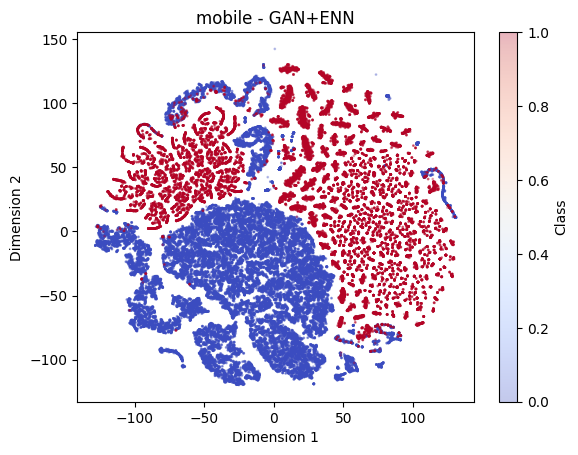

In [5]:
#import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE

features = X
labels =y

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plotting the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=labels, cmap='coolwarm',s=1,alpha=0.3)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('mobile - GAN+ENN')
plt.colorbar(label='Class')
plt.show()

In [ ]:
data = pd.concat([X, y], axis=1)


class0=data[data['churn']==0]
class1=data[data['churn']==1]

class0

,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,reloads_inactive_days,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,churn
0,1000,0,1,0.05,0.00,1,1,0,0,66,...,75.27,0.00,63.43,0.00,210,1,84,0,0.0,0
1,1000,0,25,28.31,3.45,1,0,0,0,1276,...,13.38,11.18,2.00,11.18,0,0,0,0,0.0,0
2,1005,0,8,15.62,1.97,1,0,0,0,1276,...,30.00,0.00,0.00,10.45,0,0,0,0,0.0,0
3,1032,0,2,5.86,0.15,1,0,0,1,17,...,2.58,0.00,1.00,0.00,0,0,0,0,0.0,0
4,1039,0,1,12.51,12.96,1,1,0,1,6,...,356.65,0.00,215.83,0.00,4,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52557,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0
52558,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0
52559,15947,0,1,15.00,0.00,0,0,0,1,1,...,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0
52560,15947,0,1,0.00,0.00,0,0,0,1,1,...,0.00,0.00,0.00,0.00,0,0,0,0,0.0,0


In [ ]:
#fisher discriminant ratio
def fishers_discriminant_ratio(feature):
    class1_data=data[data['churn']==0][feature]
    class2_data=data[data['churn']==1][feature]
    mean1 = sum(class1_data) / len(class1_data)
    mean2 = sum(class2_data) / len(class2_data)

    variance1 = sum((x - mean1) ** 2 for x in class1_data) / len(class1_data)
    variance2 = sum((x - mean2) ** 2 for x in class2_data) / len(class2_data)

    between_variance = len(class1_data) * (mean1 - mean2) ** 2
    within_variance = variance1 + variance2

    discriminant_ratio = between_variance / within_variance
    return discriminant_ratio


In [ ]:
exclude_feature = 'churn'
for feature in data.columns:
    if feature != exclude_feature:
        discriminant_ratio = fishers_discriminant_ratio(feature)
        print(f"Discriminant Ratio for {feature}: {discriminant_ratio}")

Discriminant Ratio for user_lifetime: 39261.3798454572
Discriminant Ratio for user_intake: 315.12240511122445
Discriminant Ratio for user_no_outgoing_activity_in_days: 6555.884554722059
Discriminant Ratio for user_account_balance_last: 3530.4061438977074
Discriminant Ratio for user_spendings: 9532.865481994853
Discriminant Ratio for user_has_outgoing_calls: 47735.651220394946
Discriminant Ratio for user_has_outgoing_sms: 64379.66497933255
Discriminant Ratio for user_use_gprs: 981.5318643324052
Discriminant Ratio for user_does_reload: 966.9595633560082
Discriminant Ratio for reloads_inactive_days: 4386.097433896414
Discriminant Ratio for reloads_count: 5980.193765993722
Discriminant Ratio for reloads_sum: 9057.316115006064
Discriminant Ratio for calls_outgoing_count: 17931.35007816926
Discriminant Ratio for calls_outgoing_spendings: 8812.005846024578
Discriminant Ratio for calls_outgoing_duration: 10201.979501725029
Discriminant Ratio for calls_outgoing_spendings_max: 12835.052731726026

In [ ]:
start2=time.time()
#Training XGBoost
#classifier = XGBClassifier(eta=0.3, max_depth = 4, gamma=0, min_child_weight=1)
classifier = XGBClassifier(colsample_bytree=0.6, max_depth = 5, gamma=1.5, min_child_weight=5)

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============XGBoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2=time.time()
print("The time of execution of xgb:",
      (end2-start2), "s")

===============XGBoost Performance====================
F1 score: 0.991
STD F1 Score: 0.001
Recall: 0.987
Specitifity: 0.945
AUC ROC: 1.000
G-Mean: 0.966
The time of execution of xgb: 353.40478134155273 s


In [ ]:

start2 = time.time()
classifier=KNeighborsClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============KNN Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end2 = time.time()
print("The time of execution of knn:",
      (end2-start2), "s")

===============KNN Performance====================
F1 score: 0.992
STD F1 Score: 0.001
Recall: 0.989
Specitifity: 0.952
AUC ROC: 0.999
G-Mean: 0.970
The time of execution of knn: 276.99909138679504 s


In [ ]:

start4 = time.time()
classifier=DecisionTreeClassifier()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============DT Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end4 = time.time()
print("The time of execution of dt:",
      (end4-start4), "s")

===============DT Performance====================
F1 score: 0.992
STD F1 Score: 0.001
Recall: 0.993
Specitifity: 0.932
AUC ROC: 0.993
G-Mean: 0.962
The time of execution of dt: 39.53859806060791 s


In [ ]:
start5 = time.time()
classifier=GaussianNB()
score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============NB Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end5 = time.time()
print("The time of execution of NB:",
      (end5-start5), "s")

===============NB Performance====================
F1 score: 0.731
STD F1 Score: 0.002
Recall: 0.982
Specitifity: 0.474
AUC ROC: 0.778
G-Mean: 0.682
The time of execution of NB: 3.5219995975494385 s


In [ ]:
start3=time.time()

classifier = GradientBoostingClassifier()

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============GBM Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))


# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))


gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end3 = time.time()
print("The time of execution of gbm:",
      (end3-start3), "s")


===============GBM Performance====================
F1 score: 0.991
STD F1 Score: 0.001
Recall: 0.984
Specitifity: 0.956
AUC ROC: 1.000
G-Mean: 0.970
The time of execution of gbm: 1673.8269765377045 s


In [ ]:
start4=time.time()
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators =100, criterion = 'gini', random_state = 0)

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============Random Forest Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')

end4 = time.time()
print("The time of execution of gbm:",
      (end4-start4), "s")


===============Random Forest Performance====================
F1 score: 0.994
STD F1 Score: 0.001
Recall: 0.992
Specitifity: 0.944
AUC ROC: 0.999
G-Mean: 0.968
The time of execution of gbm: 336.22092747688293 s


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')

score=cross_val_score(classifier, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('===============ADABoost Performance====================')

print('F1 score: %.3f' % (mean(score)))
print('STD F1 Score: %.3f' % (std(score)))

rc=cross_val_score(classifier, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall: %.3f' % (mean(rc)))

from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

# Define the specificity scorer
scorer = make_scorer(specificity_score)

# Calculate the cross-validated specificity score
sp = cross_val_score(classifier, X, y, cv=5, scoring=scorer)
print('Specitifity: %.3f' % (mean(sp)))

auc=cross_val_score(classifier, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('AUC ROC: %.3f' % (mean(auc)))

import math

gmean=rc*sp
gmean=mean(gmean)
sqrtg = math.sqrt(gmean)
print('G-Mean: %.3f' % (sqrtg))
print('======================================================')